# 作業 : (Kaggle)鐵達尼生存預測
https://www.kaggle.com/c/titanic

## 作業1
參考範例，將鐵達尼的艙位代碼( 'Cabin' )欄位使用特徵雜湊 / 標籤編碼 / 目標均值編碼三種轉換後，  
與其他數值型欄位一起預估生存機率

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy, time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

data_path = 'data/'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')

train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#只取類別值 (object) 型欄位, 存於 object_features 中
object_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'object':
        object_features.append(feature)
print(f'{len(object_features)} Numeric Features : {object_features}\n')

# 只留類別型欄位
df = df[object_features]
df = df.fillna('None')
train_num = train_Y.shape[0]
df.head()

5 Numeric Features : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']



,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,None,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,None,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,None,S


In [3]:
# 觀察欄位相異值數量
df.select_dtypes(include=["object"]).apply(pd.Series.nunique)

Name        1307
Sex            2
Ticket       929
Cabin        187
Embarked       4
dtype: int64

In [27]:
np.shape(df)

(1309, 6)

In [4]:
# 對照組 : 標籤編碼 + 邏輯斯迴歸
df_temp = pd.DataFrame()
for c in df.columns:
    df_temp[c] = LabelEncoder().fit_transform(df[c])
train_X = df_temp[:train_num]
estimator = LogisticRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())
df_temp.head()

0.780004837244799


,Name,Sex,Ticket,Cabin,Embarked
0,155,1,720,185,3
1,286,0,816,106,0
2,523,0,914,185,3
3,422,0,65,70,3
4,22,1,649,185,3


In [7]:
# 加上 'Cabin' 欄位的計數編碼
count_df = df.groupby(['Cabin'])['Name'].agg({'Cabin_Count':'size'}).reset_index()
df = pd.merge(df, count_df, on=['Cabin'], how='left')
count_df.sort_values(by=['Cabin_Count'], ascending=False).head(10)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,Cabin,Cabin_Count
185,None,1014
80,C23 C25 C27,6
184,G6,5
47,B57 B59 B63 B66,5
60,B96 B98,4
180,F2,4
117,D,4
79,C22 C26,4
181,F33,4
183,F4,4


In [26]:
df

,Name,Sex,Ticket,Cabin,Embarked,Cabin_Count
0,"Braund, Mr. Owen Harris",male,A/5 21171,None,S,1014
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,2
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,None,S,1014
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,2
4,"Allen, Mr. William Henry",male,373450,None,S,1014
5,"Moran, Mr. James",male,330877,None,Q,1014
6,"McCarthy, Mr. Timothy J",male,17463,E46,S,2
7,"Palsson, Master. Gosta Leonard",male,349909,None,S,1014
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,347742,None,S,1014
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,237736,None,C,1014


In [9]:
# 'Cabin'計數編碼 + 邏輯斯迴歸
df_temp = pd.DataFrame()
for c in object_features:
    df_temp[c] = LabelEncoder().fit_transform(df[c])
df_temp['Cabin_Count'] = df['Cabin_Count']
train_X = df_temp[:train_num]
estimator = LogisticRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())
df_temp.head()


0.7856230275549181


,Name,Sex,Ticket,Cabin,Embarked,Cabin_Count
0,155,1,720,185,3,1014
1,286,0,816,106,0,2
2,523,0,914,185,3,1014
3,422,0,65,70,3,2
4,22,1,649,185,3,1014


(0, 6)

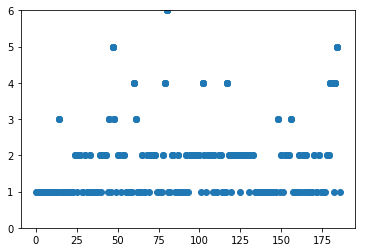

In [24]:
plt.scatter(df_temp['Cabin'],df_temp['Cabin_Count'])
plt.ylim(0,6)

In [17]:
# 'Cabin'特徵雜湊 + 邏輯斯迴歸
df_temp = pd.DataFrame()
for c in object_features:
    df_temp[c] = LabelEncoder().fit_transform(df[c])
df_temp['Cabin_Hash'] = df['Cabin'].map(lambda x:hash(x) % 10)
train_X = df_temp[:train_num]
estimator = LogisticRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())
df_temp.head()


0.781128432750417


,Name,Sex,Ticket,Cabin,Embarked,Cabin_Hash
0,155,1,720,185,3,1
1,286,0,816,106,0,0
2,523,0,914,185,3,1
3,422,0,65,70,3,4
4,22,1,649,185,3,1


In [18]:
# 'Cabin'計數編碼 + 'Cabin'特徵雜湊 + 邏輯斯迴歸
df_temp = pd.DataFrame()
for c in object_features:
    df_temp[c] = LabelEncoder().fit_transform(df[c])
df_temp['Cabin_Hash'] = df['Cabin'].map(lambda x:hash(x) % 10)
df_temp['Cabin_Count'] = df['Cabin_Count']
train_X = df_temp[:train_num]
estimator = LogisticRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())
df_temp.head()

0.7878702185661541


,Name,Sex,Ticket,Cabin,Embarked,Cabin_Hash,Cabin_Count
0,155,1,720,185,3,1,1014
1,286,0,816,106,0,0,2
2,523,0,914,185,3,1,1014
3,422,0,65,70,3,4,2
4,22,1,649,185,3,1,1014


## 作業2
承上題，三者比較效果何者最好?

ANS:最後一個的準確率最高，其次是單純做‘Cabin’計數編碼的方式,但總的來說，每一種方法都有效提升了數據的準確率